# HR Analytics - Promotion Prediction

### 📌 Problem Statement:
Your client is a large MNC and they have 9 broad verticals across the organization. One of the problems your client is facing is identifying the right people for promotion (only for manager position and below) and preparing them in time.

Currently, the process they follow is:

1. They first identify a set of employees based on recommendations/past performance.
2. Selected employees go through a separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical.
3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered), etc., an employee gets promoted.

However, the final promotions are only announced after the evaluation, which leads to delays in transitioning to their new roles.

### 🎯 Goal:
To identify **eligible candidates** for promotion at a specific checkpoint to **expedite** the promotion cycle.

You are provided with multiple attributes around the employee’s **past and current performance** along with demographics. The task is to **predict whether a potential promotee at the checkpoint will be promoted or not**.

---

### 📊 Dataset Description:

| Variable              | Definition |
|-----------------------|------------|
| `employee_id`         | Unique ID for employee |
| `department`          | Department of employee |
| `region`              | Region of employment (unordered) |
| `education`           | Education Level |
| `gender`              | Gender of Employee |
| `recruitment_channel` | Channel of recruitment for employee |
| `no_of_trainings`     | No. of other trainings completed in previous year |
| `age`                 | Age of Employee |
| `previous_year_rating` | Employee Rating for the previous year |
| `length_of_service`   | Length of service in years |
| `KPIs_met >80%`       | 1 if KPIs > 80%, else 0 |
| `awards_won?`         | 1 if awards won in previous year, else 0 |
| `avg_training_score`  | Average score in current training evaluations |
| `is_promoted`         | **Target variable** — Recommended for promotion (1 if yes, 0 if no) |




# Importing Required Libraries

In [332]:
import pandas as pd # Used for data manuplation and analysis
import numpy as np # for numerical computation and array operations
import matplotlib.pyplot as plt # for data visualsation
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading The Datasets

In [333]:
# Load the training dataset
train_df=pd.read_csv(r'train.csv')
# load the test dataset
test_df=pd.read_csv(r'test.csv')

In [334]:
# No-of rows and columns of each dataset
print(f'shape of the train dataset :{train_df.shape}')
print(f'shape of the test dataset :{test_df.shape}')

shape of the train dataset :(54808, 14)
shape of the test dataset :(23490, 13)


### Display the first five rows of each data

In [335]:
print('top 5 rows of train data :')
train_df[train_df['is_promoted']==1]

top 5 rows of train data :


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54757,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,0,81,1
54761,8278,Procurement,region_13,Bachelor's,f,sourcing,1,30,4.0,2,1,0,86,1
54792,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,0,65,1


In [336]:
print('data top 5 rows of test data :')
test_df.head()

data top 5 rows of test data :


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


### Summary of the dataframe

In [337]:
print('summary of train data :\n')
train_df.info()

summary of train data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usa

In [338]:
print('summary of the test data: \n')
test_df.info()

summary of the test data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [339]:
# merging train and test data
df=pd.concat([train_df,test_df],axis=0)

In [340]:
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0


# Data Preprocessing

In [341]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


In [342]:
df.drop(['employee_id','region'],axis=1,inplace=True)

In [343]:
# no-of null values
print(f'data :\n{20*'*'}\n{df.isna().sum()}')

data :
********************
department                  0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64


### filling null values in to dataset

In [344]:
df.head(3)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0


In [345]:
# unique values in education and previous year rating column
print(df['education'].value_counts())
df['previous_year_rating'].value_counts()

education
Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64


previous_year_rating
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [346]:
# filling the null values of education with mode vlaue 
mode_edu=df['education'].mode()
df['education'].fillna(mode_edu[0],inplace=True)
# filling the null values of previous year rating with median value
median_pyr=df['previous_year_rating'].median()
df['previous_year_rating'].fillna(median_pyr,inplace=True)

In [347]:
# 1.Imputing missing values in the education column using its mode. 
# 2.Imputing missing values in the previous_year_rating column using its median.

In [348]:
#  null values after fill the datset
train_df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [349]:
# renaming gender column values in test and train dataset
df['gender']=df['gender'].map({'m':'Male','f':'Female'})

In [350]:
# Renaming the values in the gender column to make them more meaningful.
# m: Male
# f: Female

In [351]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,Female,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,Bachelor's,Male,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,Bachelor's,Male,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,Bachelor's,Male,other,2,39,1.0,10,0,0,50,0.0
4,Technology,Bachelor's,Male,other,1,45,3.0,2,0,0,73,0.0


# Exploratory Data Analysis

In [352]:
# seperating categorical and numerical dataset
object_columns=df.select_dtypes(include='object').columns
num_columns=df.select_dtypes(include='number').columns

In [353]:
# object columns: ['department', 'region', 'education', 'gender', 'recruitment_channel'] 
# numerical columns : ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score', 'is_promoted']

In [354]:
# getting numeric catgorical and continus data columns from the numeric data
cat_columns=[]
continous_columns=[]
for col in num_columns:
    val=df[col].nunique()
    if val<20:
        cat_columns.append(col)
    else:
        continous_columns.append(col)
print(f'categorical columns :{cat_columns},\n numerical columns :{continous_columns}')

categorical columns :['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
 numerical columns :['age', 'length_of_service', 'avg_training_score']


### Univariant analysis

#### numerical continous_columns

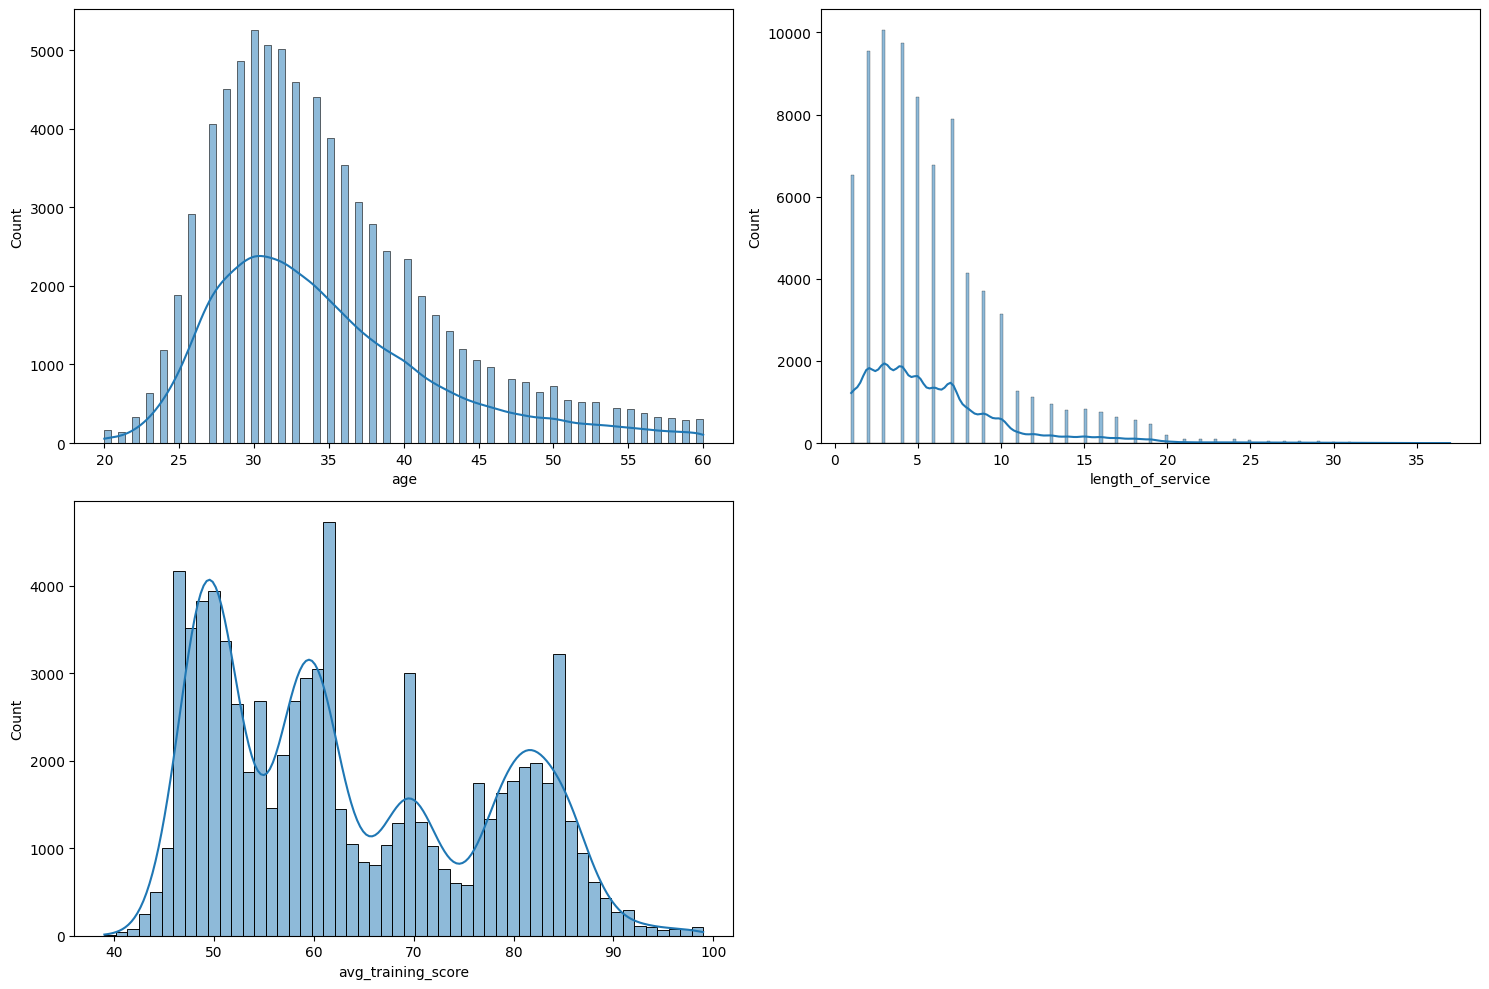

In [355]:
### histogram of the all numeric continous  columns
plt.figure(figsize=(15,10))
for i,col in enumerate(continous_columns,1):
    plt.subplot((len(continous_columns)+2)//2,2,i)
    sns.histplot(x=col,kde=True,data=df)
plt.tight_layout()
plt.show()

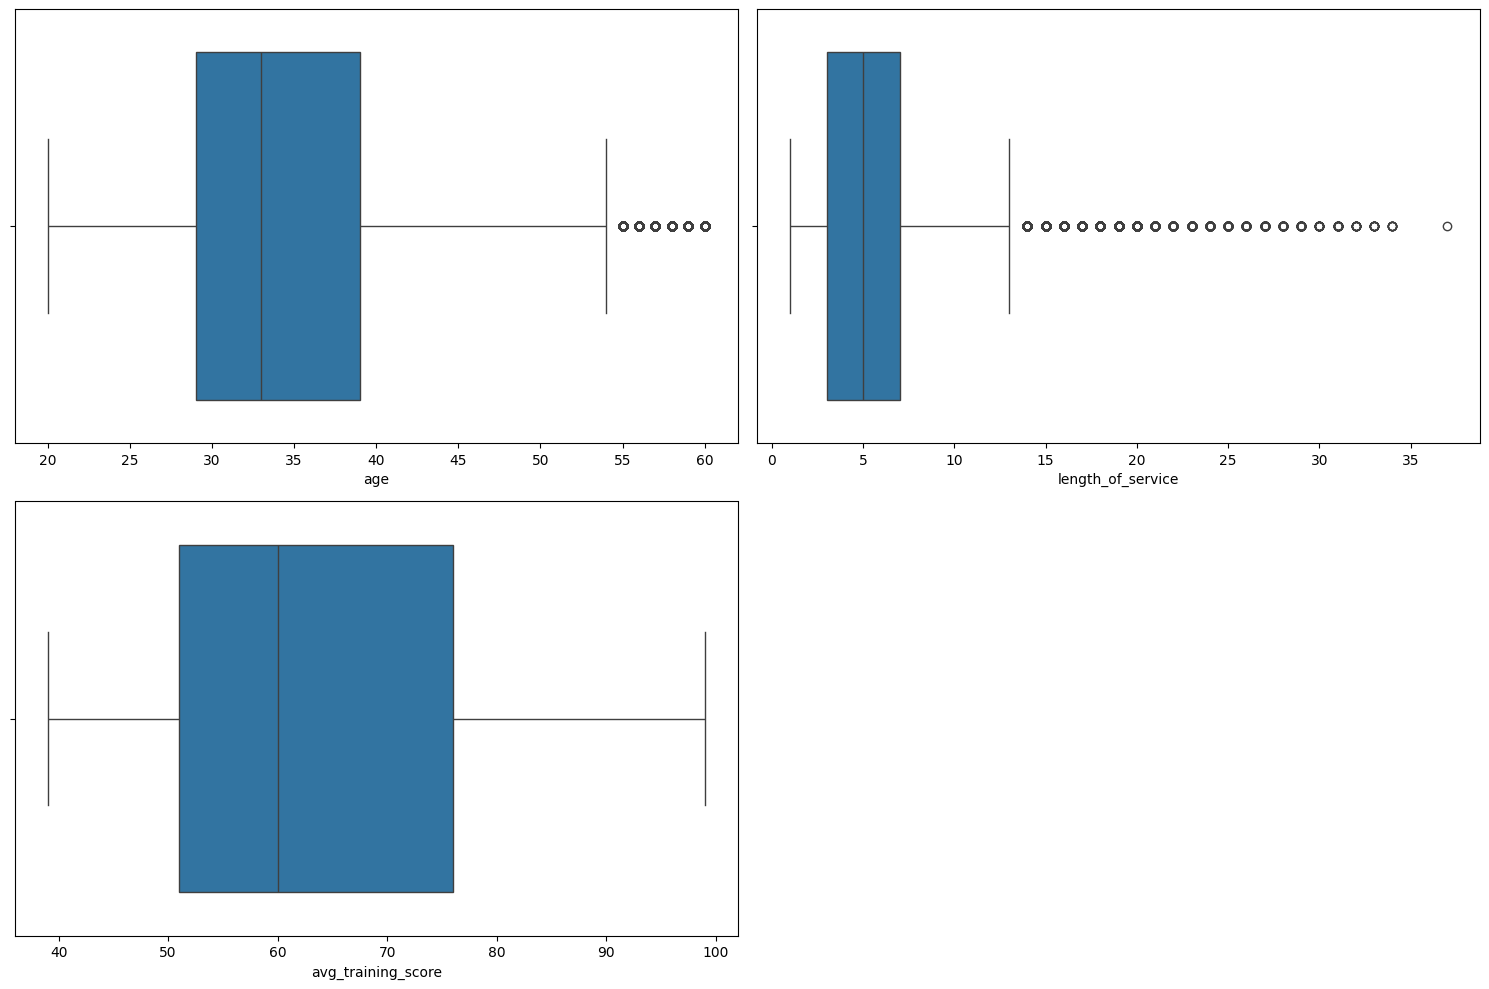

In [356]:
### histogram of the all numeric continous  columns
plt.figure(figsize=(15,10))
for i,col in enumerate(continous_columns,1):
    plt.subplot((len(continous_columns)+2)//2,2,i)
    sns.boxplot(x=col,data=df)
plt.tight_layout()
plt.show()

#### numerical categorical columns

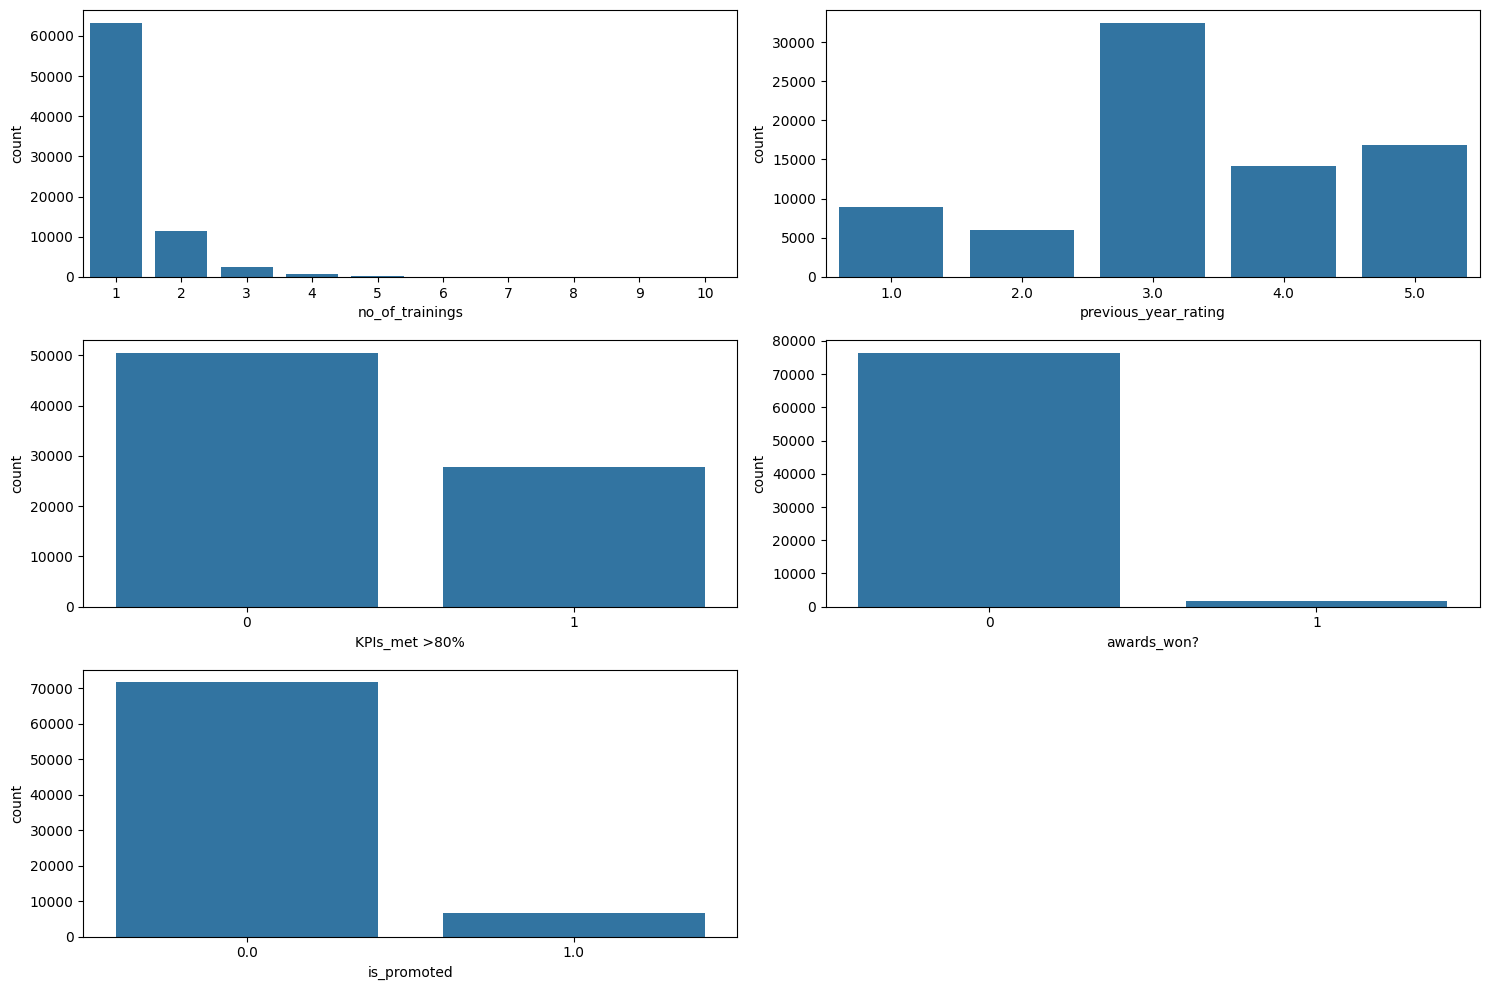

In [357]:
### barchar of the all numeric categorical  columns
plt.figure(figsize=(15,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot((len(cat_columns)+2)//2,2,i)
    sns.countplot(x=col,data=df)
plt.tight_layout()
plt.show()

#### countplot on object columns

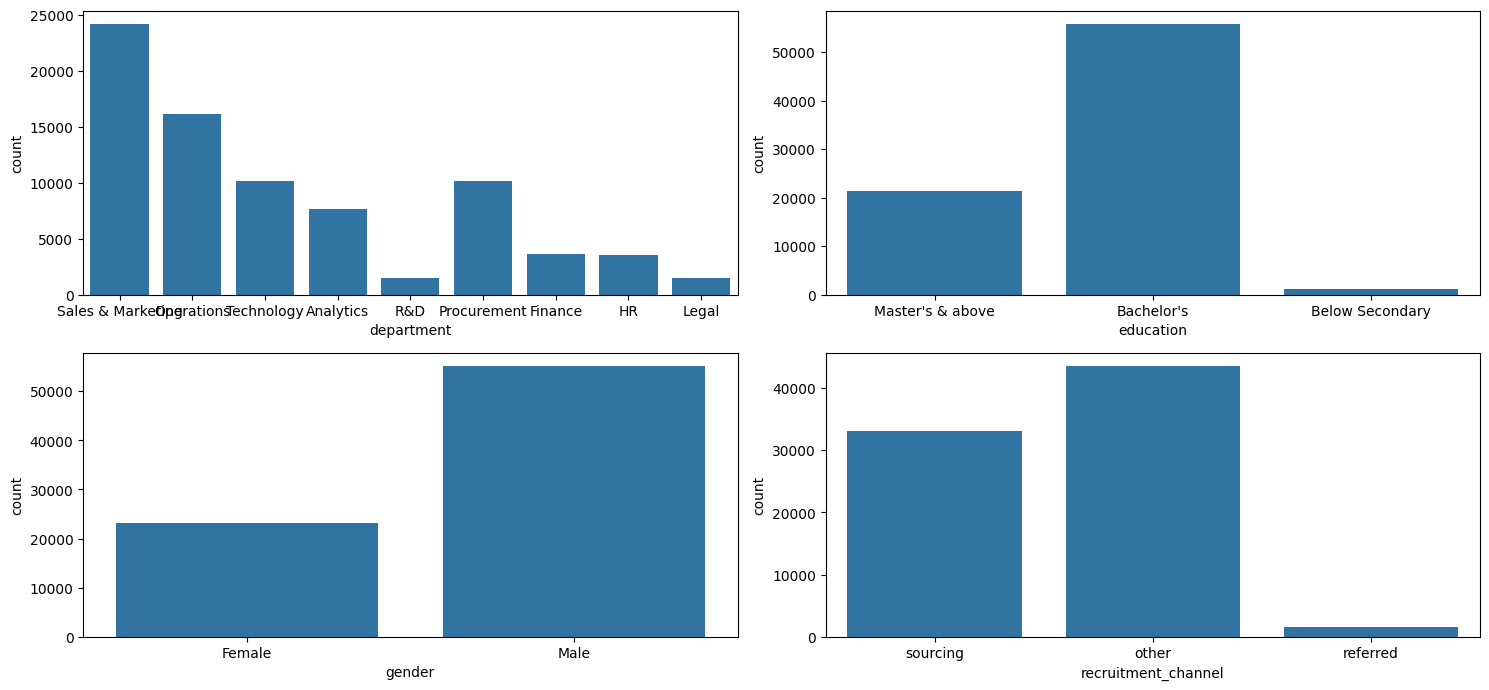

In [358]:
### barchar of the all object columns
plt.figure(figsize=(15,10))
for i,col in enumerate(object_columns,1):
    plt.subplot((len(object_columns)+2)//2,2,i)
    sns.countplot(x=col,data=df)
plt.tight_layout()
plt.show()

<Axes: >

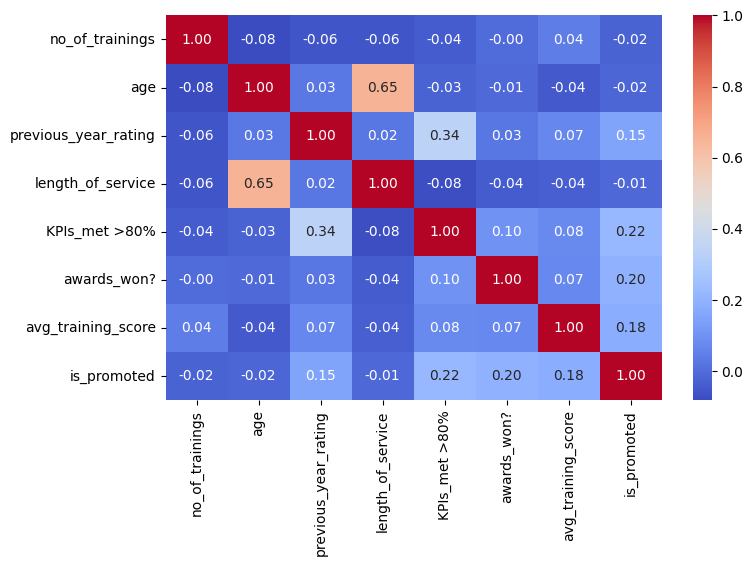

In [359]:
# correlation 
corr=df[num_columns].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')

## Bivariant Analysis

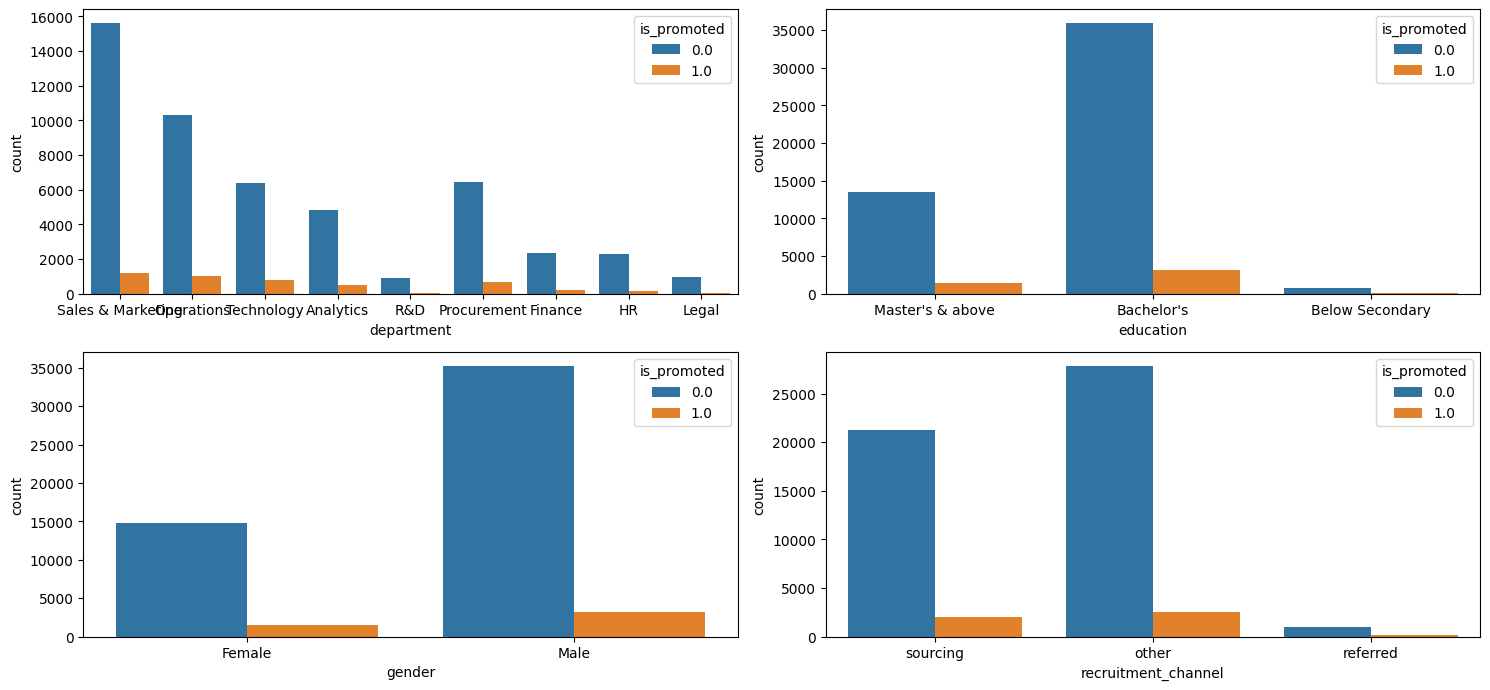

In [360]:
# analysying the continous column with promoted
### histogram of the all numeric continous  columns
plt.figure(figsize=(15,10))
for i,col in enumerate(object_columns,1):
    plt.subplot((len(object_columns)+2)//2,2,i)
    sns.countplot(x=col,hue='is_promoted',data=df)
plt.tight_layout()
plt.show()

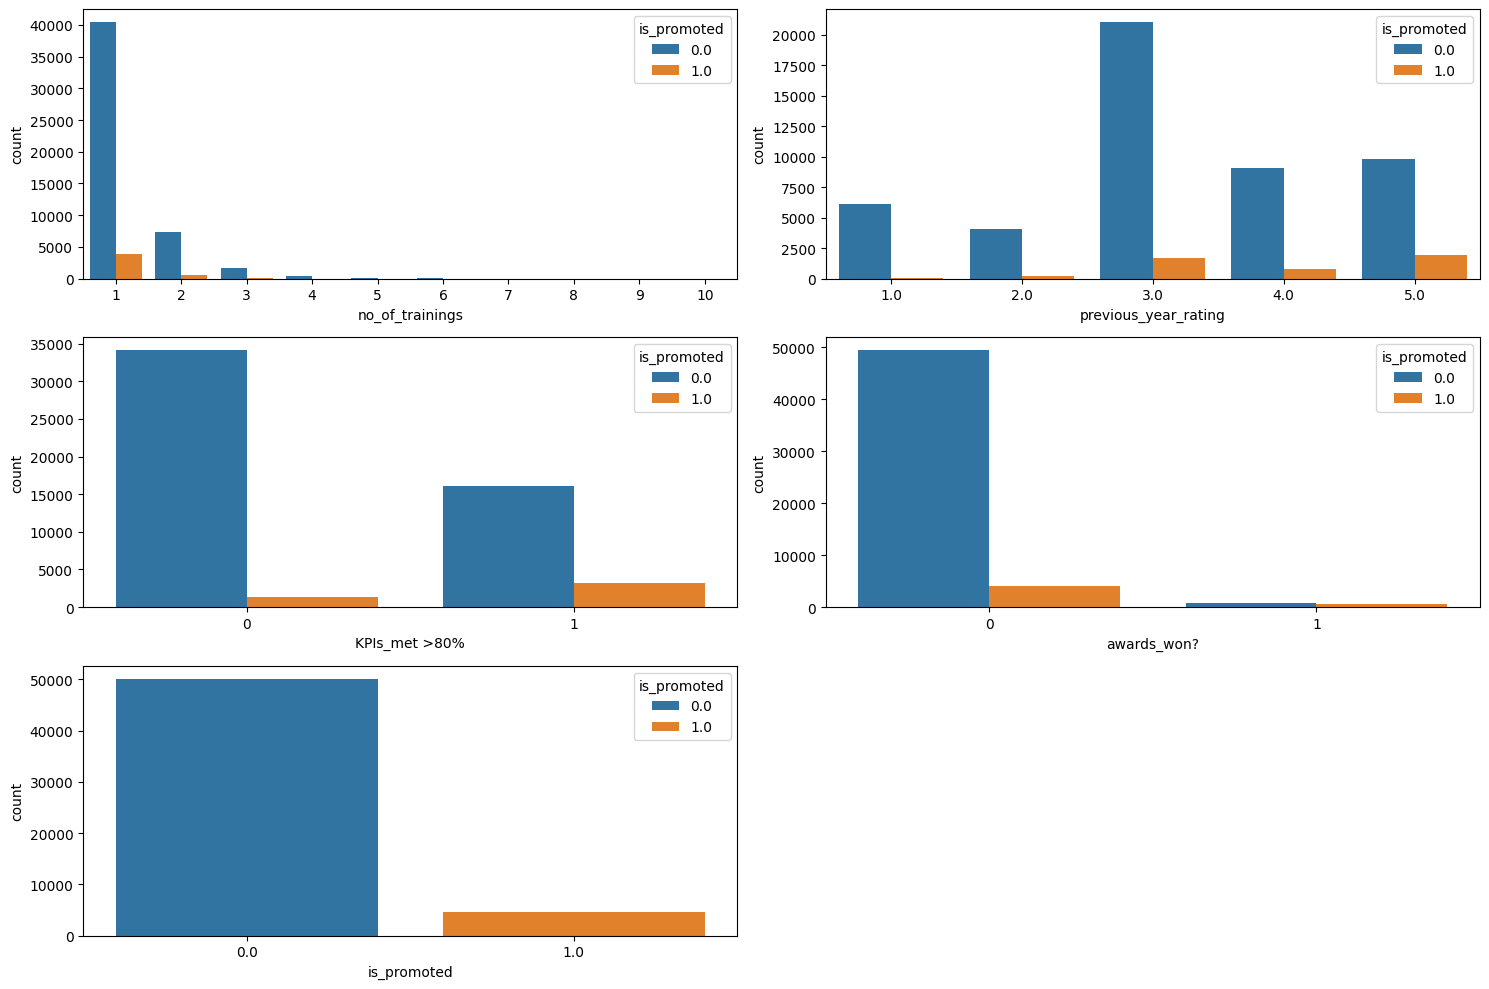

In [361]:
# analysying the continous column with promoted
### histogram of the all numeric continous  columns
plt.figure(figsize=(15,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot((len(cat_columns)+2)//2,2,i)
    sns.countplot(x=col,hue='is_promoted',data=df)
plt.tight_layout()
plt.show()

In [362]:
import pickle
from sklearn.preprocessing import LabelEncoder

object_columns = ["department", "education", "gender",'recruitment_channel']
encoders = {}

for col in object_columns:
    le = LabelEncoder()
    
    le.fit(df[col])
    encoders[col] = le
    df[col] = le.transform(df[col])

# Save encoders
with open("models/label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [363]:
# seperating test_df and train_df
train_df_updated=df.iloc[:len(train_df)]
test_df_updated=df.iloc[len(train_df):]

In [364]:
train_df_updated.corr()['is_promoted'].sort_values()

no_of_trainings        -0.024896
age                    -0.017166
gender                 -0.011109
length_of_service      -0.010670
department              0.000130
recruitment_channel     0.002229
education               0.029257
previous_year_rating    0.153230
avg_training_score      0.181147
awards_won?             0.195871
KPIs_met >80%           0.221582
is_promoted             1.000000
Name: is_promoted, dtype: float64

# spliting train and test data

In [365]:
features=train_df_updated.drop('is_promoted',axis=1)
target=train_df_updated['is_promoted']

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=40,shuffle=True)

In [368]:
# Checking the shape of training and testing datasets for features and target variables
print(f'shape of the input x-train :{x_train.shape} \nshape of the input x-test :{x_test.shape} \nshape of the output y-train :{y_train.shape} \nshape of the output y-test :{y_test.shape}')

shape of the input x-train :(43846, 11) 
shape of the input x-test :(10962, 11) 
shape of the output y-train :(43846,) 
shape of the output y-test :(10962,)


### Scaling the features

In [369]:
# featuring scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [370]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# saving scaler as pickle

In [371]:
import joblib
from sklearn.preprocessing import MinMaxScaler

# Scaling
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Save scaler
joblib.dump(scaler, "models/minmax_scaler.pkl")

['models/minmax_scaler.pkl']

In [372]:
# Importing various classification algorithms for model comparison and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#Tree Based models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

In [373]:
models={
    'logistic regression':LogisticRegression(),
    'neighbors':KNeighborsClassifier(n_neighbors=7),
    'decision tree':DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=55),
    'random forest':RandomForestClassifier(n_estimators=100,max_depth=None,random_state=55),
    'gradient boosting':GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,random_state=55),
    'ada boosting':AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    'bagging':BaggingClassifier(n_estimators=10, random_state=42)
}

### Model Training and evaluating

In [374]:
# function for model training 
def model_training(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    score=accuracy_score(y_test,ypred)
    score=np.round(score,5)
    return model,score

In [375]:
acc_li={}
model_trained_list={}
for i,model in models.items():
    print(f'{i} :')
    model_trained,score=model_training(model,x_train_scaled,x_test_scaled,y_train,y_test)
    model_trained_list[i]=model_trained
    acc_li[i]=score
    print('Accuracy Score :',score)
    print(50*'-')
    print(50*'-')

logistic regression :
Accuracy Score : 0.92155
--------------------------------------------------
--------------------------------------------------
neighbors :
Accuracy Score : 0.92702
--------------------------------------------------
--------------------------------------------------
decision tree :
Accuracy Score : 0.89865
--------------------------------------------------
--------------------------------------------------
random forest :
Accuracy Score : 0.93532
--------------------------------------------------
--------------------------------------------------
gradient boosting :
Accuracy Score : 0.9459
--------------------------------------------------
--------------------------------------------------
ada boosting :
Accuracy Score : 0.92465
--------------------------------------------------
--------------------------------------------------
bagging :
Accuracy Score : 0.93259
--------------------------------------------------
--------------------------------------------------


In [376]:
# creating DataFrame for model and its score

In [377]:
score_df=pd.DataFrame(list(acc_li.items()),columns=['Model','Accuracy_score'])

In [378]:
score_df=score_df.sort_values(by='Accuracy_score',ascending=False).reset_index(drop=True)

In [379]:
score_df

,Model,Accuracy_score
0,gradient boosting,0.94590
1,random forest,0.93532
2,bagging,0.93259
3,neighbors,0.92702
4,ada boosting,0.92465
5,logistic regression,0.92155
6,decision tree,0.89865


In [380]:
#best model 
best_model=model_trained_list[score_df['Model'].iloc[0]]
best_model

GradientBoostingClassifier(max_depth=5, random_state=55)

In [381]:
#loading model
joblib.dump(best_model,'models/model.h5')

['models/model.h5']

# ROC Curve

In [382]:
from sklearn.metrics import roc_curve, auc

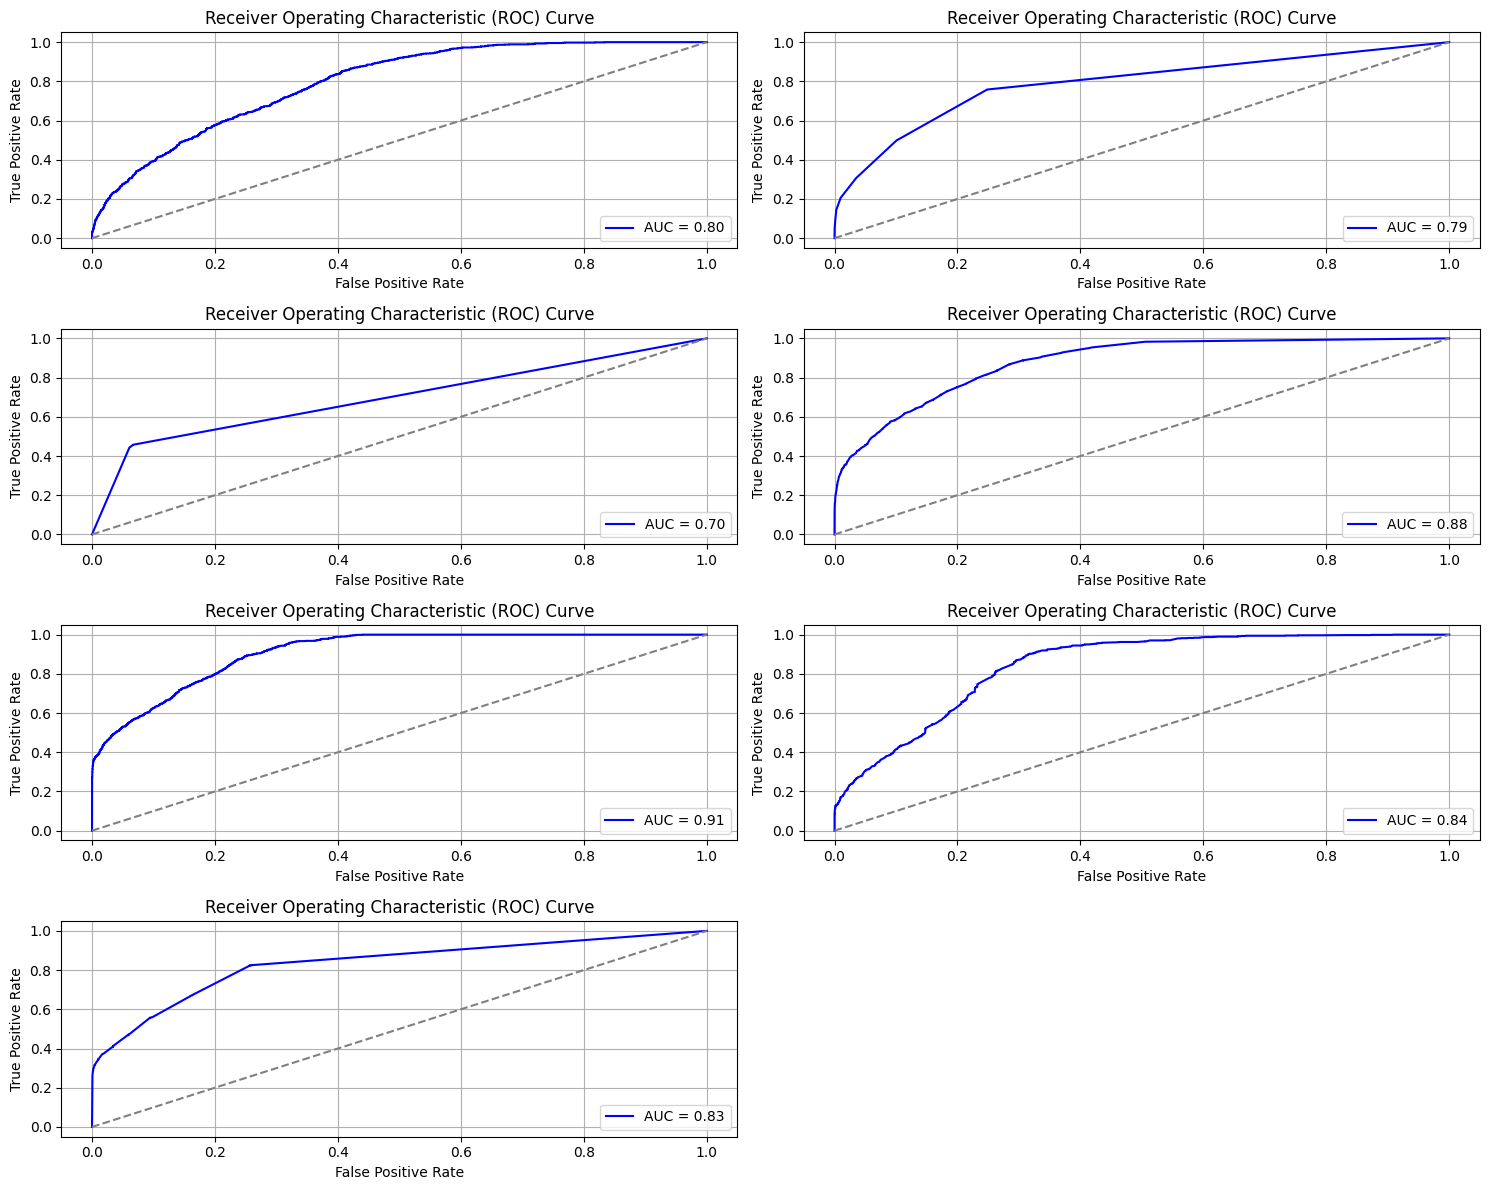

In [383]:
plt.figure(figsize=(15,12))
for i, (name, model) in enumerate(model_trained_list.items(), 1):
    model.fit(x_train_scaled, y_train)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(x_test_scaled)[:, 1]
    
    # Get FPR, TPR
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC in subplots
    plt.subplot((len(model_trained_list) + 1) // 2, 2, i)
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
plt.tight_layout()
plt.show()

# submission data

In [384]:
submission_data=test_df_updated.drop(['is_promoted'],axis=1)

In [385]:
submission_data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,0,1,2,1,24,3.0,1,1,0,77
1,2,0,0,0,1,31,3.0,5,0,0,51
2,7,0,1,0,1,31,1.0,4,0,0,47
3,5,0,0,0,3,31,2.0,9,0,0,65
4,1,0,1,2,1,30,4.0,7,0,0,61


In [386]:
submission_data_scaled=scaler.transform(submission_data)

In [387]:
submission_data_scaled

array([[1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.63333333],
       [0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.2       ],
       [0.875     , 0.        , 1.        , ..., 0.        , 0.        ,
        0.13333333],
       ...,
       [0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.18333333],
       [0.625     , 0.        , 1.        , ..., 0.        , 0.        ,
        0.51666667],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.83333333]])

In [388]:
for model_name,model in model_trained_list.items():
    print(model_name,model)
    ypred=model.predict(submission_data_scaled)
    print('zeros')
    print(np.sum(ypred==0))
    print('ones')
    print(np.sum(ypred==1))

logistic regression LogisticRegression()
zeros
23259
ones
231
neighbors KNeighborsClassifier(n_neighbors=7)
zeros
22891
ones
599
decision tree DecisionTreeClassifier(random_state=55)
zeros
21355
ones
2135
random forest RandomForestClassifier(random_state=55)
zeros
22650
ones
840
gradient boosting GradientBoostingClassifier(max_depth=5, random_state=55)
zeros
22814
ones
676
ada boosting AdaBoostClassifier()
zeros
22983
ones
507
bagging BaggingClassifier(random_state=42)
zeros
22337
ones
1153


In [410]:
output=best_model.predict(submission_data_scaled)

In [416]:
submission_df = pd.DataFrame({
    'employee_id': test_df['employee_id'].values,
    'is_promoted': output.astype(int).flatten()
})

In [419]:
submission_df.to_csv('sample_submission.csv',index=False)